#Neural Network Assignment-1
###Tejus Vidyadhar Kusur 2018A3PS0531H###

Connecting to gdrive for the datasets

In [5]:
# Load the Drive helper and mount
#from google.colab import drive
#drive.mount('/content/drive')

Importing the required libraries for all questions:

In [18]:
#Importing the libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Question 1
### Batch gradient descent algorithm for Linear Regression###

###Loading the data:###

#Loading data
training_df = pd.read_excel("/content/drive/My Drive/BITS/Neural-Network/Datasheets/training_feature_matrix.xlsx", header=None)
x_train_orig = training_df.to_numpy()
train_op_df = pd.read_excel("/content/drive/My Drive/BITS/Neural-Network/Datasheets/training_output.xlsx", header=None)
y_train = train_op_df.to_numpy()
y_train = np.delete(y_train, 0)
testing_df = pd.read_excel("/content/drive/My Drive/BITS/Neural-Network/Datasheets/test_feature_matrix.xlsx", header=None)
x_test_orig = testing_df.to_numpy()
test_op_df = pd.read_excel("/content/drive/My Drive/BITS/Neural-Network/Datasheets/test_output.xlsx", header=None)
y_test = test_op_df.to_numpy()

assert(x_train_orig.shape[0] == y_train.shape[0])
assert(x_test_orig.shape[0] == y_test.shape[0])

##Loading from local machine##

In [7]:
#Loading data
training_df = pd.read_excel("Datasheets/training_feature_matrix.xlsx", header=None)
x_train_orig = training_df.to_numpy()
train_op_df = pd.read_excel("Datasheets/training_output.xlsx", header=None)
y_train = train_op_df.to_numpy()
y_train = np.delete(y_train, 0)
testing_df = pd.read_excel("Datasheets/test_feature_matrix.xlsx", header=None)
x_test_orig = testing_df.to_numpy()
test_op_df = pd.read_excel("Datasheets/test_output.xlsx", header=None)
y_test = test_op_df.to_numpy()

assert(x_train_orig.shape[0] == y_train.shape[0])
assert(x_test_orig.shape[0] == y_test.shape[0])

###Normalizing function (min-max):###

In [8]:
def normalize(features):
    """mean-std normalization of provided feature matrix

    Args:
        features (matrix): a matrix of input parameters x1, x2, ... xn

    Returns:
        None: None
    """

    fmin = np.min(features)
    frange = np.max(features, axis=0) - np.min(features, axis=0)
    features -= fmin

    features /= frange
    return features

###Normilizing the imput matrix:###

In [9]:
x_train_norm = normalize(x_train_orig)
x_test_norm = normalize(x_test_orig)

###Number of elements and bias term of feature matrices###

In [10]:
#Train and test size
m_train = x_train_norm.shape[0]
m_test = x_test_norm.shape[0]
x_train = np.insert(x_train_norm, 0, np.ones(m_train), axis=1)
x_test = np.insert(x_test_norm, 0, np.ones(m_test), axis=1)

###Hypothesis function:

In [11]:
def hypothesis(theta, X):
    """hypothesis function for linear regression

    Args:
        theta ([float]): an array of weights; size n
        X ([[float]]): feature element for making predictions

    Returns:
        [float]: array of predicted output values for calculating MSE
    """

    hw = 0
    for i in range(X.shape[0]):
      hw += theta[i] * X[i]
    return hw

### Propagation function:

In [12]:
def propagate(theta, X, Y):
    """
    Implement the batch gradient descent cost function and its gradient for the propagation

    Arguments:
    theta -- features, a numpy array of size (n, 1)
    X -- feature matrix
    Y -- output feature martix

    Return:
    cost -- Cost for linear regression
    dtheta -- gradient of the loss

    """
    cost = 0
    dtheta = np.zeros([theta.shape[0], 1]) #Cost 
    m = X.shape[0] #Number of elements
    n = theta.shape[0] #Number of features
    
    
    for i in range(m):
      # FORWARD PROPAGATION (FROM X TO COST)
      hw = hypothesis(theta, X[i])
      cost += (1/ 2) * ((hw - Y[i]) ** 2) #1/2m
      # BACKWARD PROPAGATION (TO FIND GRAD)
      for j in range(n):
        dtheta[j] = 1 * (hw - Y[i]) * X[i][j] #1/m
    
    return dtheta, cost

###Linear Regression Batch Gradient Descent Optimization function

In [13]:
def optimize(theta, X, Y, num_iters, alpha, thetalist, print_cost = True):
    """
    This function optimizes theta by running a gradient descent algorithm
    
    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix
    num_iters -- number of iterations of the optimization loop
    alpha -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 20 steps
    
    Returns:
    theta -- final weight values
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
    
    costs = []
    
    for i in range(num_iters):
        
        
        # Cost and gradient calculation
        dtheta, cost = propagate(theta, X, Y)
        
        # update rule
        for j in range(theta.shape[0]):
          theta[j] = theta[j] - alpha * dtheta[j]
        thetalist[i] = theta.T

        # Record the costs
        costs.append(cost)
        
        # Print the cost every 20 training iterations
        if print_cost and i % 20 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return theta, costs, thetalist

###Implementation of the model##

In [21]:
alpha = 0.01
num_iters = 200
n = x_train.shape[1]
theta = np.zeros(shape=[n, 1])
thetalist = np.zeros(shape=(num_iters,3))
theta, costs, thetalist = optimize(theta, x_train, y_train, num_iters, alpha, thetalist)

Cost after iteration 0: 37223.637135
Cost after iteration 20: 18342.401609
Cost after iteration 40: 10918.653672
Cost after iteration 60: 7742.666168
Cost after iteration 80: 6271.121521
Cost after iteration 100: 5543.813409
Cost after iteration 120: 5167.405068
Cost after iteration 140: 4966.688067
Cost after iteration 160: 4857.686482
Cost after iteration 180: 4797.854402


###Plotting the cost vs iterations plot

Text(0, 0.5, 'cost')

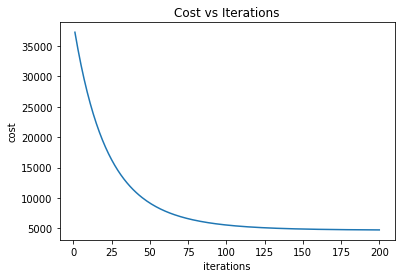

In [15]:
m = [x for x in range(1, num_iters+1)]
plt.plot(m, costs)
plt.title("Cost vs Iterations")
plt.xlabel('iterations')
plt.ylabel('cost')

###3D Plot:

Text(0.5, 0, 'Theta2')

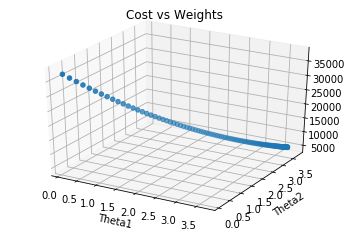

In [19]:
# 3D plot
# cost vs  theta[1]    and     theta[2]
#   Z  vs     X        and        Y
thetaX = []
thetaY = []

for i in thetalist:
  thetaX.append(i[1])
  thetaY.append(i[2])
      
# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(thetaX, thetaY, costs)
plt.title("Cost vs Weights")
plt.xlabel("Theta1")
plt.ylabel("Theta2")

###MSE Calculation:

In [20]:
# printing training and testing mse values

y_predicted = np.zeros(m_train)
for i in range(m_train):
  y_predicted[i] = hypothesis(theta, x_train[i])
mse_training = np.mean((y_predicted - y_train)**2)
print("Training MSE:", mse_training)
y_predicted = np.zeros(m_test)
for i in range(m_test):
  y_predicted[i] = hypothesis(theta, x_test[i])
mse_testing = np.mean((y_predicted - y_test)**2)
print("Testing MSE:", mse_testing)

Training MSE: 38.8964034963713
Testing MSE: 9.980300099216784
